<a href="https://colab.research.google.com/github/tanvir-redoy/Visualization-of-Point-Cloud-PLY-files-and-convert-PLY-to-PNG/blob/main/Visualization_of_PLY_files_and_convert_PLY_to_PNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
!pip install -q open3d

In [205]:
import open3d as o3d
import numpy as np

In [223]:
from google.colab import files

uploaded = files.upload()  # choose your .ply file

Saving seg-00000-027.ply to seg-00000-027.ply


In [224]:
ply_filename = list(uploaded.keys())[0]  # grabs the uploaded file name

pcd = o3d.io.read_point_cloud(ply_filename)
print(pcd)

PointCloud with 86079 points.


In [225]:
import numpy as np

points_full = np.asarray(pcd.points)
colors_full = np.asarray(pcd.colors) if pcd.has_colors() else None

print(points_full.shape)

(86079, 3)


In [226]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider

# downsample for speed in the widget
n_show = min(20000, points_full.shape[0])
idx = np.random.choice(points_full.shape[0], size=n_show, replace=False)
P = points_full[idx]
C = colors_full[idx] if colors_full is not None else None

def euler_matrix(yaw_deg, pitch_deg, roll_deg):
    """Z-Y-X (yaw-pitch-roll) rotation matrix."""
    y = np.deg2rad(yaw_deg)
    p = np.deg2rad(pitch_deg)
    r = np.deg2rad(roll_deg)

    Rz = np.array([[ np.cos(y), -np.sin(y), 0],
                   [ np.sin(y),  np.cos(y), 0],
                   [        0,         0, 1]])

    Ry = np.array([[ np.cos(p), 0, np.sin(p)],
                   [        0, 1,        0],
                   [-np.sin(p), 0, np.cos(p)]])

    Rx = np.array([[1,        0,         0],
                   [0, np.cos(r), -np.sin(r)],
                   [0, np.sin(r),  np.cos(r)]])
    return Rz @ Ry @ Rx   # yaw → pitch → roll

def show_rotated(yaw=0.0, pitch=0.0, roll=0.0):
    R = euler_matrix(yaw, pitch, roll)
    Pr = (R @ P.T).T

    fig = plt.figure(figsize=(5, 6))
    ax = fig.add_subplot(111, projection='3d')

    if C is not None:
        ax.scatter(Pr[:,0], Pr[:,1], Pr[:,2], s=0.5, c=C)
    else:
        ax.scatter(Pr[:,0], Pr[:,1], Pr[:,2], s=0.5)

    ax.set_title(f"yaw={yaw:.1f}, pitch={pitch:.1f}, roll={roll:.1f}")
    ax.set_axis_off()
    ax.view_init(elev=10, azim=30)
    plt.show()

interact(
    show_rotated,
    yaw=FloatSlider(min=-180, max=180, step=5, value=0),
    pitch=FloatSlider(min=-180, max=180, step=5, value=0),
    roll=FloatSlider(min=-180, max=180, step=5, value=0),
);

interactive(children=(FloatSlider(value=0.0, description='yaw', max=180.0, min=-180.0, step=5.0), FloatSlider(…

In [227]:
best_yaw   = 125.0   # example, replace with yours
best_pitch = 0.0
best_roll  = -20.0

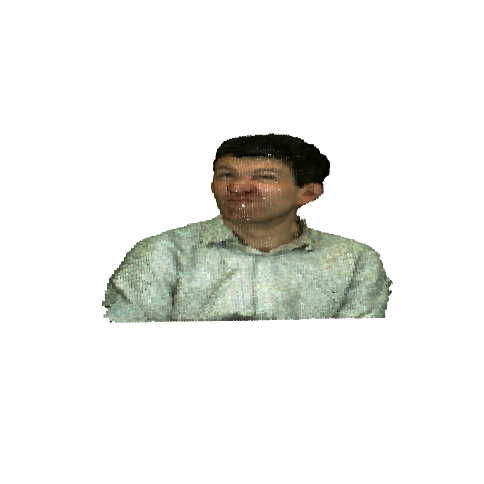

What you’re seeing now (the “fat” look) is not because the person is actually wider;
it’s because Matplotlib’s 3D plot is stretching the axes unequally. We just need to force equal aspect ratio.


In [228]:
R_best = euler_matrix(best_yaw, best_pitch, best_roll)

points_oriented = (R_best @ points_full.T).T

# visualize full-res
fig = plt.figure(figsize=(6, 7))
ax = fig.add_subplot(111, projection='3d')

if colors_full is not None:
    ax.scatter(points_oriented[:,0],
               points_oriented[:,1],
               points_oriented[:,2],
               s=0.4, c=colors_full)
else:
    ax.scatter(points_oriented[:,0],
               points_oriented[:,1],
               points_oriented[:,2],
               s=0.4)

ax.set_axis_off()
ax.view_init(elev=10, azim=30)
plt.show()
print('What you’re seeing now (the “fat” look) is not because the person is actually wider;\nit’s because Matplotlib’s 3D plot is stretching the axes unequally. We just need to force equal aspect ratio.')

In [229]:
import numpy as np

best_yaw   = 125.0
best_pitch = 0.0
best_roll  = -20.0

def euler_matrix(yaw_deg, pitch_deg, roll_deg):
    y = np.deg2rad(yaw_deg)
    p = np.deg2rad(pitch_deg)
    r = np.deg2rad(roll_deg)

    Rz = np.array([[ np.cos(y), -np.sin(y), 0],
                   [ np.sin(y),  np.cos(y), 0],
                   [        0,         0, 1]])

    Ry = np.array([[ np.cos(p), 0, np.sin(p)],
                   [        0, 1,        0],
                   [-np.sin(p), 0, np.cos(p)]])

    Rx = np.array([[1,        0,         0],
                   [0, np.cos(r), -np.sin(r)],
                   [0, np.sin(r),  np.cos(r)]])
    return Rz @ Ry @ Rx

R_best = euler_matrix(best_yaw, best_pitch, best_roll)

points = np.asarray(pcd.points)
colors = np.asarray(pcd.colors) if pcd.has_colors() else None

points_oriented = (R_best @ points.T).T

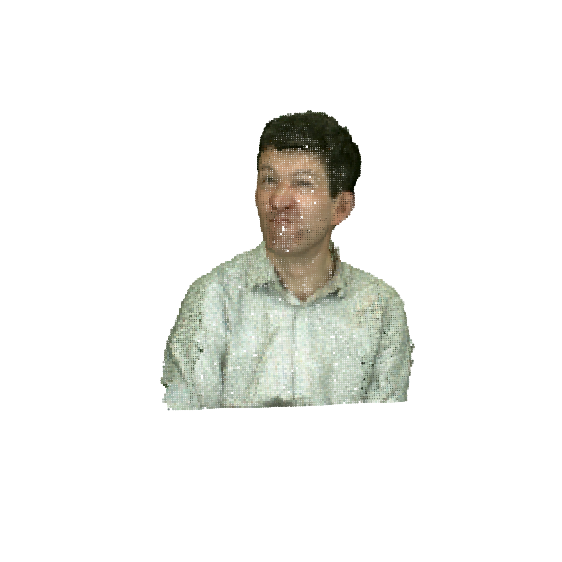

In [240]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 8))
ax = fig.add_subplot(111, projection='3d')

gamma = 0.7   # lower γ → brighter
colors_gamma = np.power(colors, gamma)

ax.scatter(points_oriented[:,0],
           points_oriented[:,1],
           points_oriented[:,2],
           s=0.3,
           c=colors_gamma if colors is not None else None)

# --- equal aspect ratio ---
mins = points_oriented.min(axis=0)
maxs = points_oriented.max(axis=0)
ranges = maxs - mins
max_range = ranges.max()

mid = (maxs + mins) / 2.0

ax.set_xlim(mid[0] - max_range/2, mid[0] + max_range/2)
ax.set_ylim(mid[1] - max_range/2, mid[1] + max_range/2)
ax.set_zlim(mid[2] - max_range/2, mid[2] + max_range/2)

# (if your Matplotlib supports it, this helps too)
try:
    ax.set_box_aspect((1, 1, 1))
except Exception:
    pass

ax.set_axis_off()
ax.view_init(elev=20, azim=30)

plt.savefig("dec_frame0027_low.png", dpi=600, bbox_inches='tight')
plt.show()

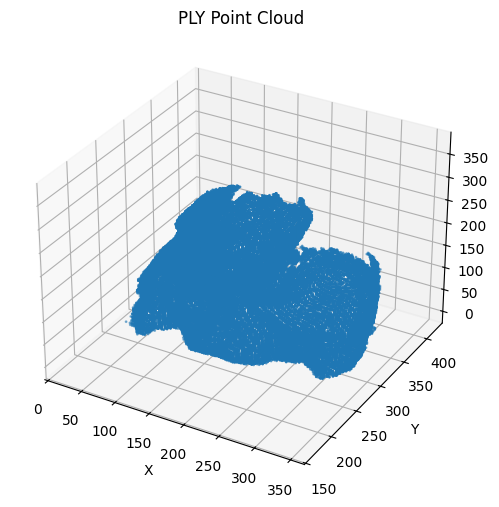

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

points = np.asarray(pcd.points)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('PLY Point Cloud')

plt.show()

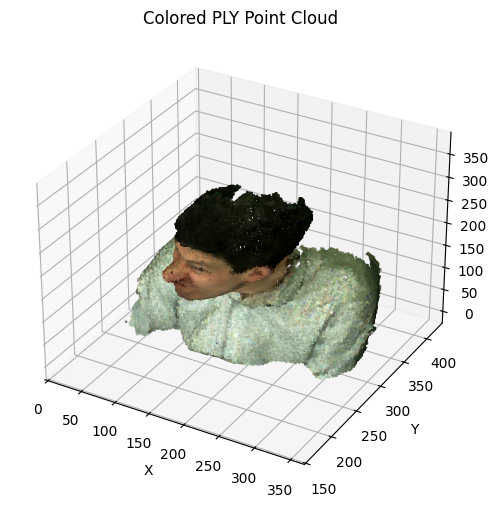

In [123]:
# points[:, 0] = -points[:, 0]
# points[:, 1] = -points[:, 1]
# points[:, 2] = -points[:, 2]

if pcd.has_colors():
    colors = np.asarray(pcd.colors)
else:
    # default color if none in the file
    colors = np.ones_like(points)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors, s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Colored PLY Point Cloud')
plt.show()